# Monte Carlo Simulation

*Disclaimer: The information provided in this analysis of AAPL, GOOG, AMZN, and MSFT financial data is for educational purposes only and should not be considered as financial advice. The results and insights presented may not accurately reflect future performance, and investing in these stocks involves significant risk. It is strongly recommended to consult with a qualified financial advisor before making any investment decisions.*

[*********************100%***********************]  4 of 4 completed
<ipython-input-7-d160b16a7224>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_price = prices[-1]


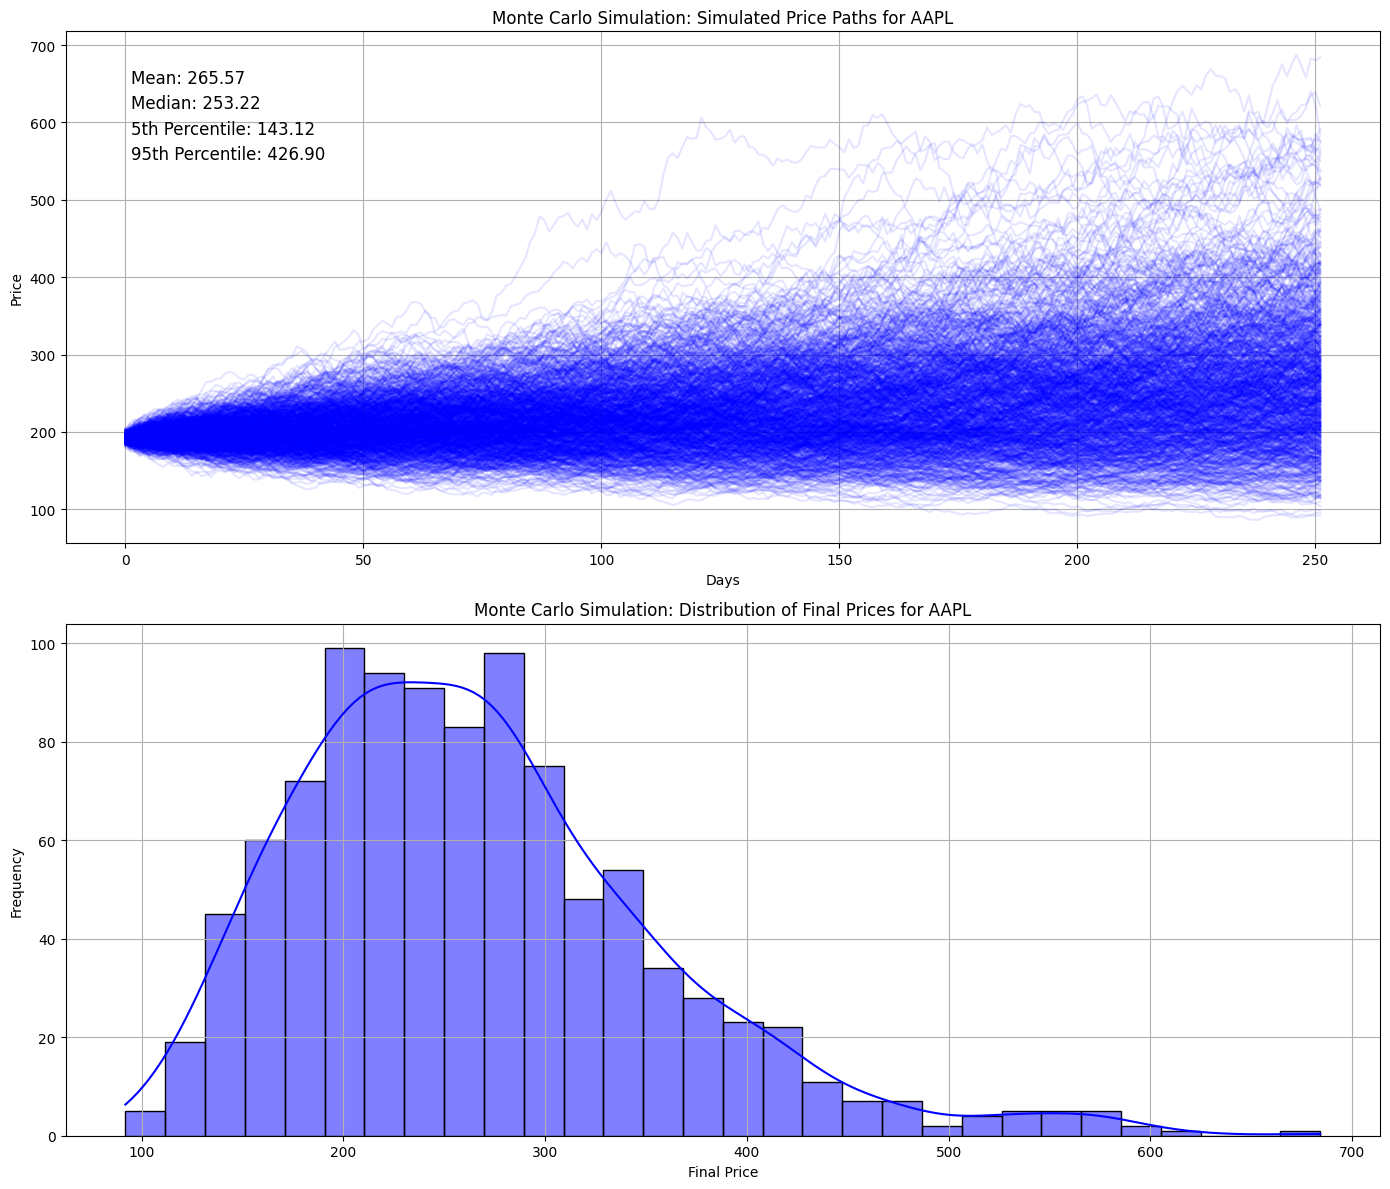

Mean Final Price: 265.57436456479854
Median Final Price: 253.21658599510283
5th Percentile Final Price: 143.1193222790324
95th Percentile Final Price: 426.90295432953917


<ipython-input-7-d160b16a7224>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_price = prices[-1]


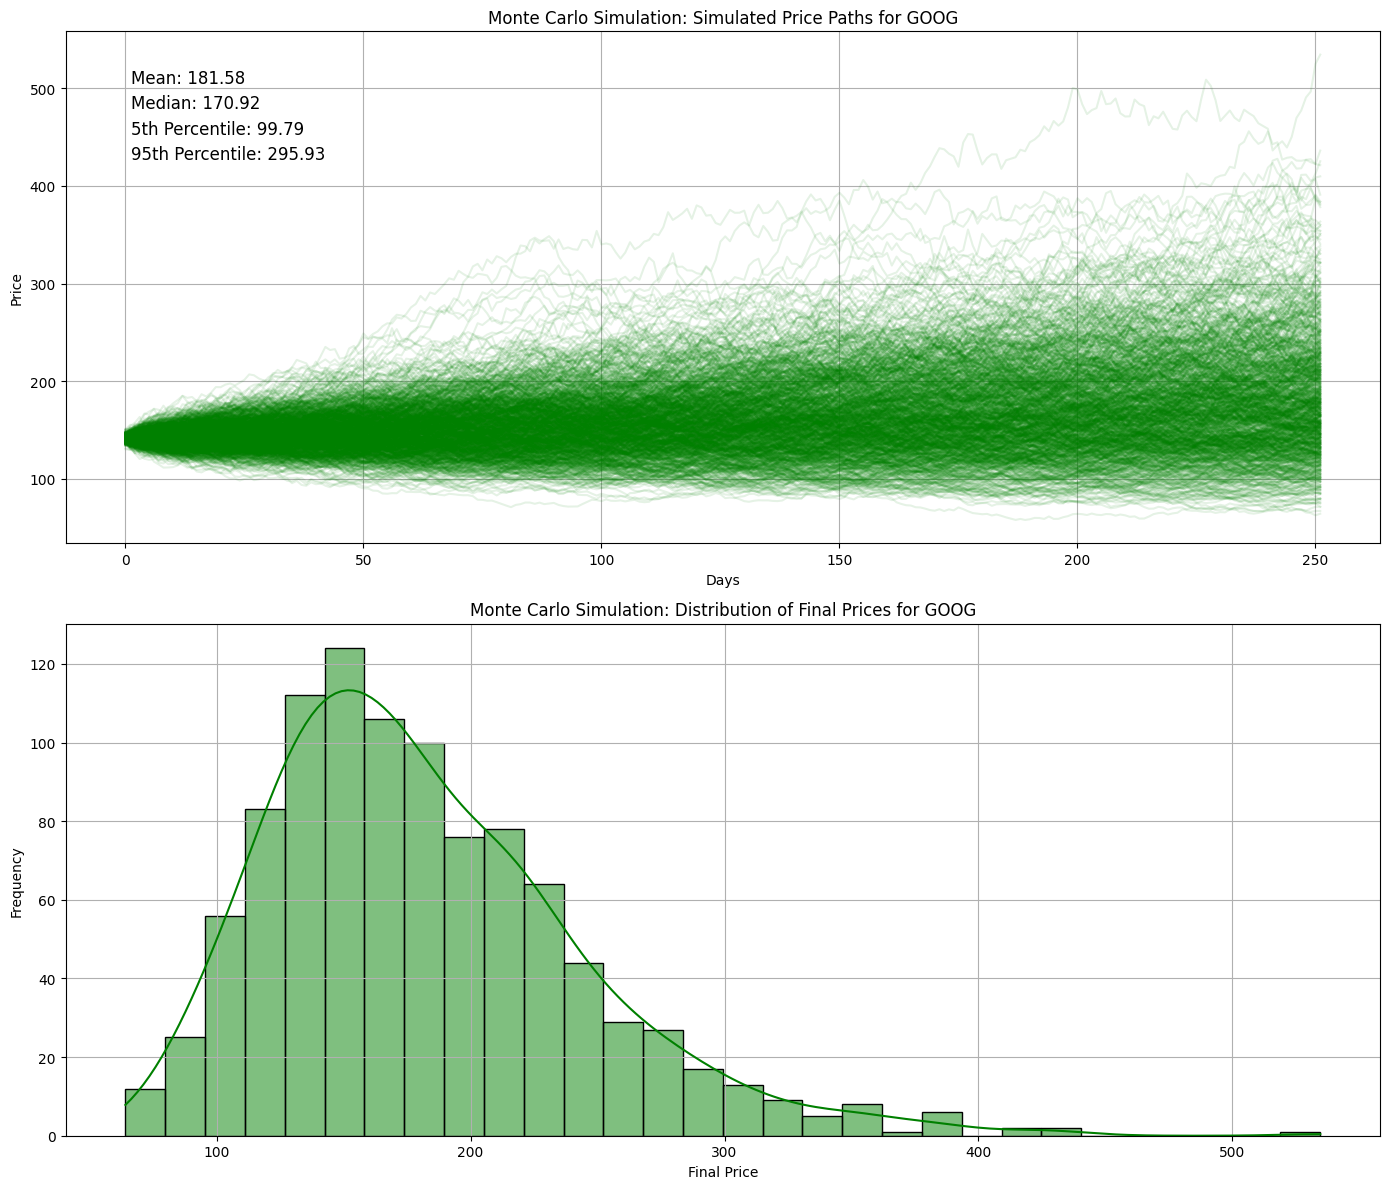

Mean Final Price: 223.57749225532513
Median Final Price: 208.52299514629422
5th Percentile Final Price: 111.89078178744909
95th Percentile Final Price: 390.0547822194123


<ipython-input-7-d160b16a7224>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_price = prices[-1]


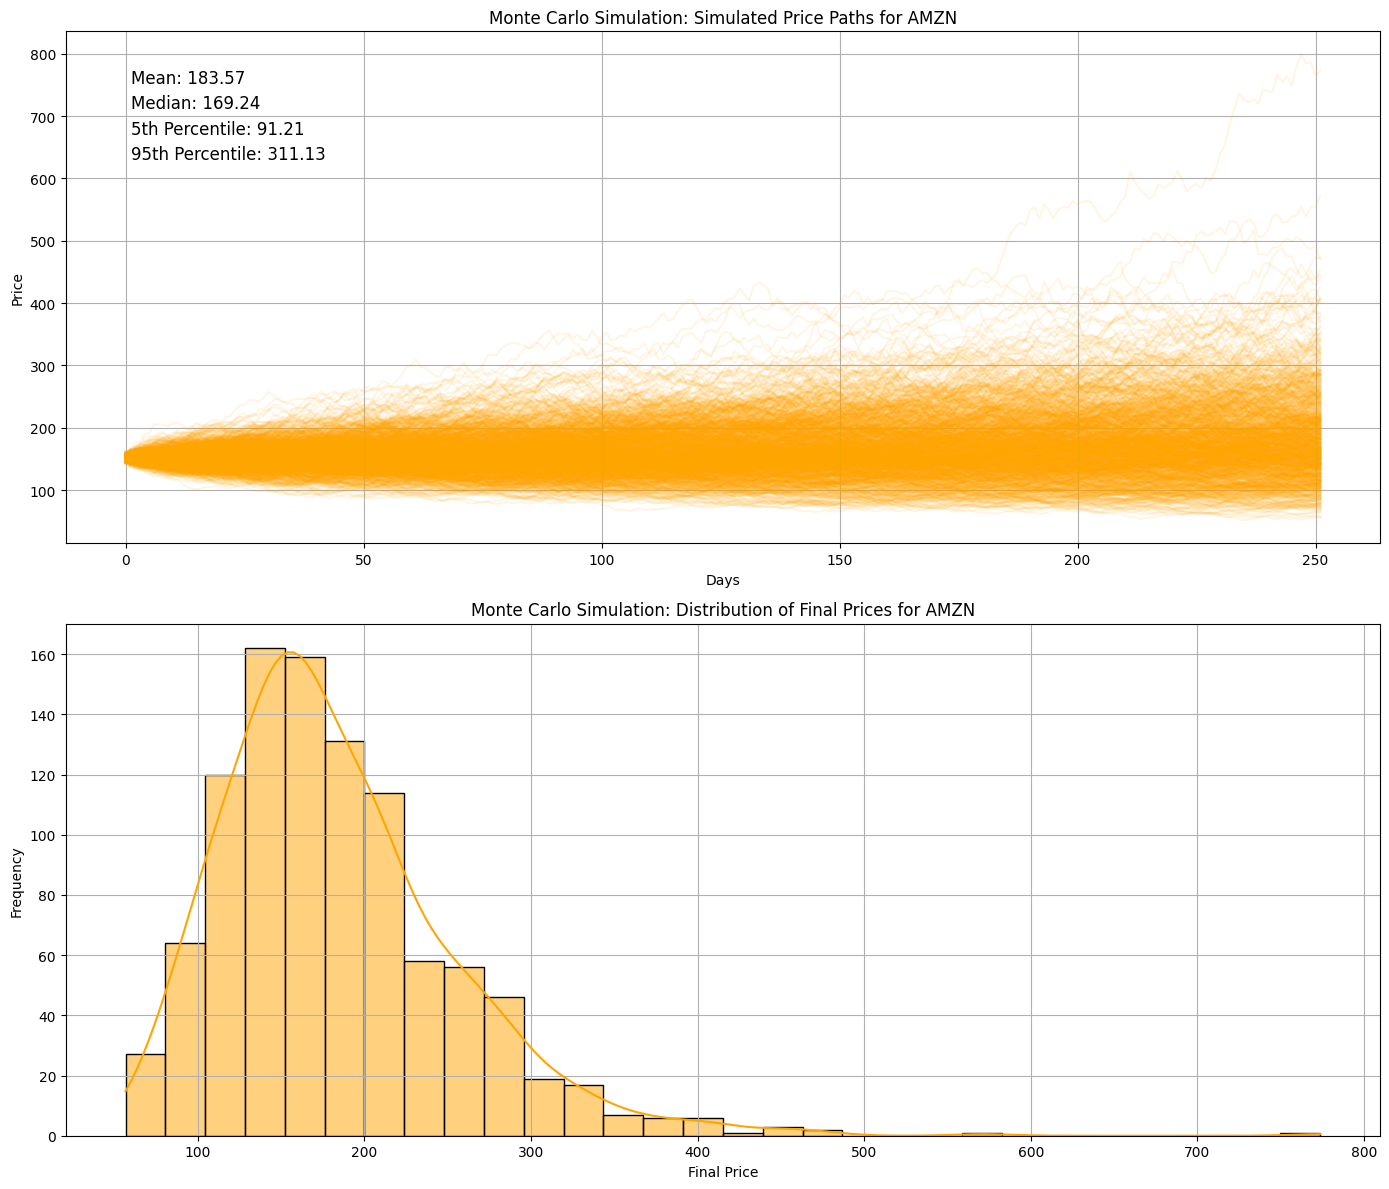

Mean Final Price: 210.24319852384235
Median Final Price: 194.5778058476451
5th Percentile Final Price: 103.2351844983749
95th Percentile Final Price: 369.8377393801165


<ipython-input-7-d160b16a7224>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_price = prices[-1]


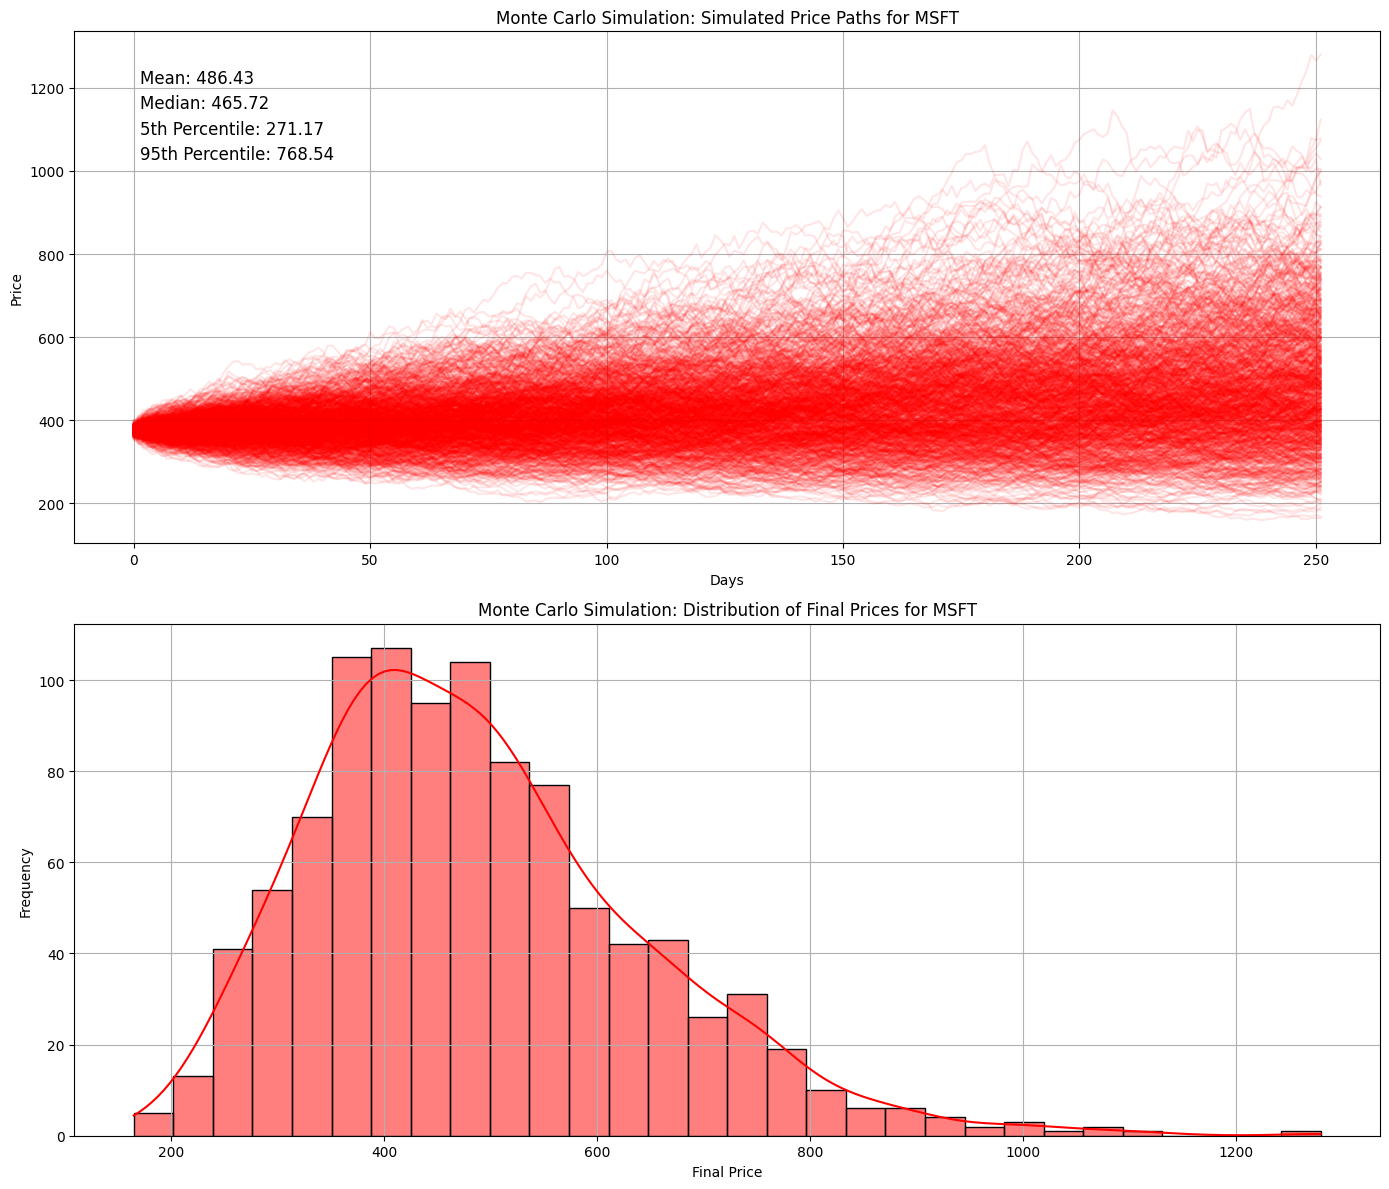

Mean Final Price: 279.2898048883175
Median Final Price: 229.34941840004268
5th Percentile Final Price: 108.89564864222763
95th Percentile Final Price: 610.2333006605738


In [7]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Step 1: Define the list of stocks and colors
tickers = ['AAPL', 'GOOG', 'AMZN', 'MSFT']
colors = {'AAPL': 'blue', 'GOOG': 'green', 'AMZN': 'orange', 'MSFT': 'red'}

# Step 2: Download historical stock price data
stock_data = yf.download(tickers, start="2020-01-01", end="2024-01-01", group_by='ticker')

# Step 3: Initialize simulation parameters
num_simulations = 1000
num_days = 252  # Number of trading days in a year
final_prices = {ticker: [] for ticker in tickers}

# Step 4: Perform the Monte Carlo simulation and plot each stock separately
for ticker in tickers:
    # Create a new figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

    prices = stock_data[ticker]['Close']
    daily_returns = prices.pct_change().dropna()
    mu = daily_returns.mean()
    sigma = daily_returns.std()
    last_price = prices[-1]

    # Plot each simulated price path
    for _ in range(num_simulations):
        simulated_returns = np.random.normal(mu, sigma, num_days)
        price_path = last_price * (1 + simulated_returns).cumprod()
        ax1.plot(price_path, color=colors[ticker], alpha=0.1)  # Plot each path

        # Store the final price
        final_prices[ticker].append(price_path[-1])

    # Show the simulated price paths for the current stock
    ax1.set_title(f"Monte Carlo Simulation: Simulated Price Paths for {ticker}")
    ax1.set_xlabel("Days")
    ax1.set_ylabel("Price")
    ax1.grid()

    # Calculate statistical measures for the current stock
    mean_price = np.mean(final_prices[ticker])
    median_price = np.median(final_prices[ticker])
    percentile_5 = np.percentile(final_prices[ticker], 5)
    percentile_95 = np.percentile(final_prices[ticker], 95)

    # Annotate statistical measures on the simulation plot
    ax1.annotate(f'Mean: {mean_price:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='black')
    ax1.annotate(f'Median: {median_price:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='black')
    ax1.annotate(f'5th Percentile: {percentile_5:.2f}', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12, color='black')
    ax1.annotate(f'95th Percentile: {percentile_95:.2f}', xy=(0.05, 0.75), xycoords='axes fraction', fontsize=12, color='black')

    # Step 5: Plot the distribution of final prices for the current stock
    sns.histplot(final_prices[ticker], bins=30, color=colors[ticker], ax=ax2, kde=True)
    ax2.set_title(f"Monte Carlo Simulation: Distribution of Final Prices for {ticker}")
    ax2.set_xlabel("Final Price")
    ax2.set_ylabel("Frequency")
    ax2.grid()

    # Show the combined plot for the current stock
    plt.tight_layout()
    plt.show()

    #Calculate and print statistical measures
    ending_prices = [final_prices[ticker] for ticker in tickers]
    ending_prices = np.concatenate(ending_prices)  # Flatten the list for overall statistics
    print(f"Mean Final Price: {np.mean(ending_prices)}")
    print(f"Median Final Price: {np.median(ending_prices)}")
    print(f"5th Percentile Final Price: {np.percentile(ending_prices, 5)}")
    print(f"95th Percentile Final Price: {np.percentile(ending_prices, 95)}")